# Spotify Music Data Visual Analysis

<u>Dataset</u>: music.csv

Description of columns:
- Highest Charting Position: The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Number of Times Charted: The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Week of Highest Charting: The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Song Name: Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Song iD: The song ID provided by Spotify (unique to each song).
- Streams: Approximate number of streams the song has.
- Artist: The main artist/ artists involved in making the song.
- Artist Followers: The number of followers the main artist has on Spotify.
- Genre: The genres the song belongs to.
- Release Date: The initial date that the song was released.
- Weeks Charted: The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Popularity:The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.
- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Chord: The main chord of the song instrumental.

In [1]:
import pandas as pd

df = pd.read_csv(r'music.csv')
df = df.dropna(how='any',axis=0)

### Top 10 Followed Artistes and Streams

In [2]:
df['Artist Followers'] = df['Artist Followers'].str.replace(' ', '')
df[['Artist Followers']] = df[['Artist Followers']].apply(pd.to_numeric, axis=1)
df[['Artist Followers']] = df[['Artist Followers']].fillna(0).astype(int)


df['Streams'] = df['Streams'].str.replace(',', '')
df['Streams'] = df['Streams'].str.replace(' ', '')
df[['Streams']] = df[['Streams']].apply(pd.to_numeric, axis=1)
df[['Streams']] = df[['Streams']].fillna(0).astype(int)

In [3]:
df_artist_followers = df[['Artist', 'Artist Followers']]
df_artist_followers = df_artist_followers[~df_artist_followers['Artist'].str.contains(',')]
df_artist_followers = df_artist_followers.sort_values(by = ['Artist Followers'], ascending = False)
df_artist_followers = df_artist_followers[["Artist", "Artist Followers"]].drop_duplicates(subset='Artist', keep='first')

top10f_artist = df_artist_followers.head(10)

In [4]:
df_artist_streams = df[['Artist', 'Streams']]
df_artist_streams = df_artist_streams.groupby('Artist')['Streams'].sum().reset_index()
df_artist_streams = df_artist_streams[["Artist", "Streams"]].drop_duplicates()
df_artist_streams = df_artist_streams.sort_values(by = ['Streams'], ascending = False)

top10s_artist = df_artist_streams.head(10)

In [5]:
in_both_lists = list(set(top10f_artist['Artist']) & set(top10s_artist['Artist']))

fs_combine = pd.merge(df_artist_followers, df_artist_streams)
fs_combine.loc[0, 'Artist']

for i in range(11):
    if fs_combine.loc[i, 'Artist'] in in_both_lists:
        fs_combine.loc[i, 'Both List'] = 'Yes'
    else:
        fs_combine.loc[i, 'Both List'] = 'No'

top10 = fs_combine.head(10)

Text(0, 0.5, "Streams by 100M ('00 000 000)")

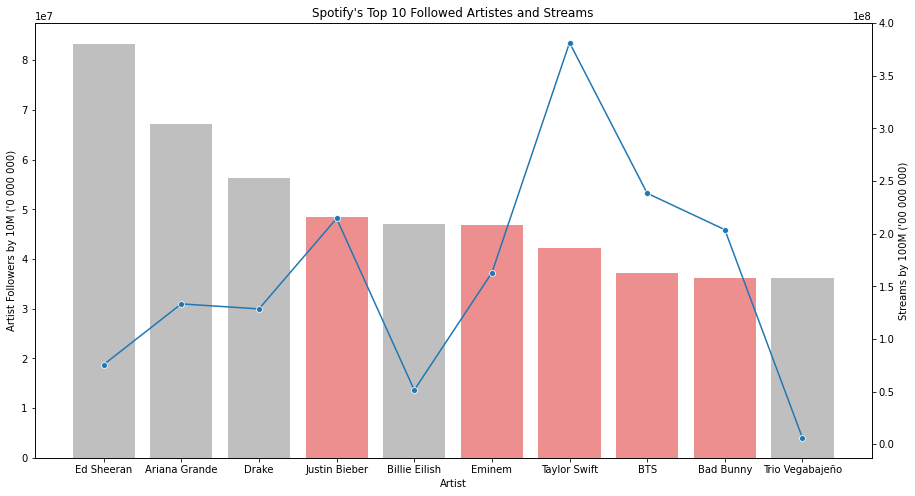

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

clrs = ['grey'
   if (x == 'No')
   else 'red'
   for x in fs_combine['Both List']
]

fig, ax1 = plt.subplots(figsize=(15,8))

sns.barplot(data = top10, x = 'Artist', y = 'Artist Followers', alpha=0.5, ax=ax1, palette = clrs)
ax2 = ax1.twinx()
sns.lineplot(data = top10['Streams'], marker='o', sort = False, ax=ax2)
ax1.set_title("Spotify's Top 10 Followed Artistes and Streams")
ax1.set_ylabel("Artist Followers by 10M ('0 000 000)")
ax2.set_ylabel("Streams by 100M ('00 000 000)")

#### The Top 10 most followerd artists are Ed Sheeran, Ariana Grande, Drake, Justin Bieber, Billie Eilish, Eminem, Taylor Swift, BTS, Bad Bunny and Trio Vegabejano. Taylor Swift also has the highest number of streams amonst the Top 10 followed artists. Artists that are both Top 10 followed and Top 10 streamed are Justin Bieber, Eminem, Taylor Swift, BTS and Bad Bunny.

### Explore Sound Quality of Top 10 Followed Artistes

In [7]:
df['Popularity'] = df['Popularity'].str.replace(' ', '')
df[['Popularity']] = df[['Popularity']].apply(pd.to_numeric, axis=1)
df[['Popularity']] = df[['Popularity']].fillna(0.0).astype(int)

df['Speechiness'] = df['Speechiness'].str.replace(' ', '')
df[['Speechiness']] = df[['Speechiness']].apply(pd.to_numeric, axis=1)

df['Valence'] = df['Valence'].str.replace(' ', '')
df[['Valence']] = df[['Valence']].apply(pd.to_numeric, axis=1)

In [8]:
justin_bieber = df[df['Artist'] == 'Justin Bieber']
jb = justin_bieber[['Artist','Song Name', 'Release Date', 'Popularity', 'Speechiness', 'Valence']]
jb.loc[:,'Release Date'] = pd.to_datetime(jb['Release Date'], format='%m/%d/%Y')

eminem = df[df['Artist'] == 'Eminem']
em = eminem[['Artist','Song Name', 'Release Date', 'Popularity', 'Speechiness', 'Valence']]
em.loc[:,'Release Date'] = pd.to_datetime(em['Release Date'], format='%m/%d/%Y')

taylor_swift = df[df['Artist'] == 'Taylor Swift']
ts = taylor_swift[['Artist','Song Name', 'Release Date', 'Popularity', 'Speechiness', 'Valence']]
ts.loc[:,'Release Date'] = pd.to_datetime(ts['Release Date'], format='%m/%d/%Y')

BTS = df[df['Artist'] == 'BTS']
bts = BTS[['Artist','Song Name', 'Release Date', 'Popularity', 'Speechiness', 'Valence']]
bts.loc[:,'Release Date'] = pd.to_datetime(bts['Release Date'], format='%m/%d/%Y')

bad_bunny = df[df['Artist'] == 'Bad Bunny']
bb = bad_bunny[['Artist','Song Name', 'Release Date', 'Popularity', 'Speechiness', 'Valence']]
bb.loc[:,'Release Date'] = pd.to_datetime(bb['Release Date'], format='%m/%d/%Y')

C:\Users\ranic\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


(0.0, 1.0, 0.0, 1.0)

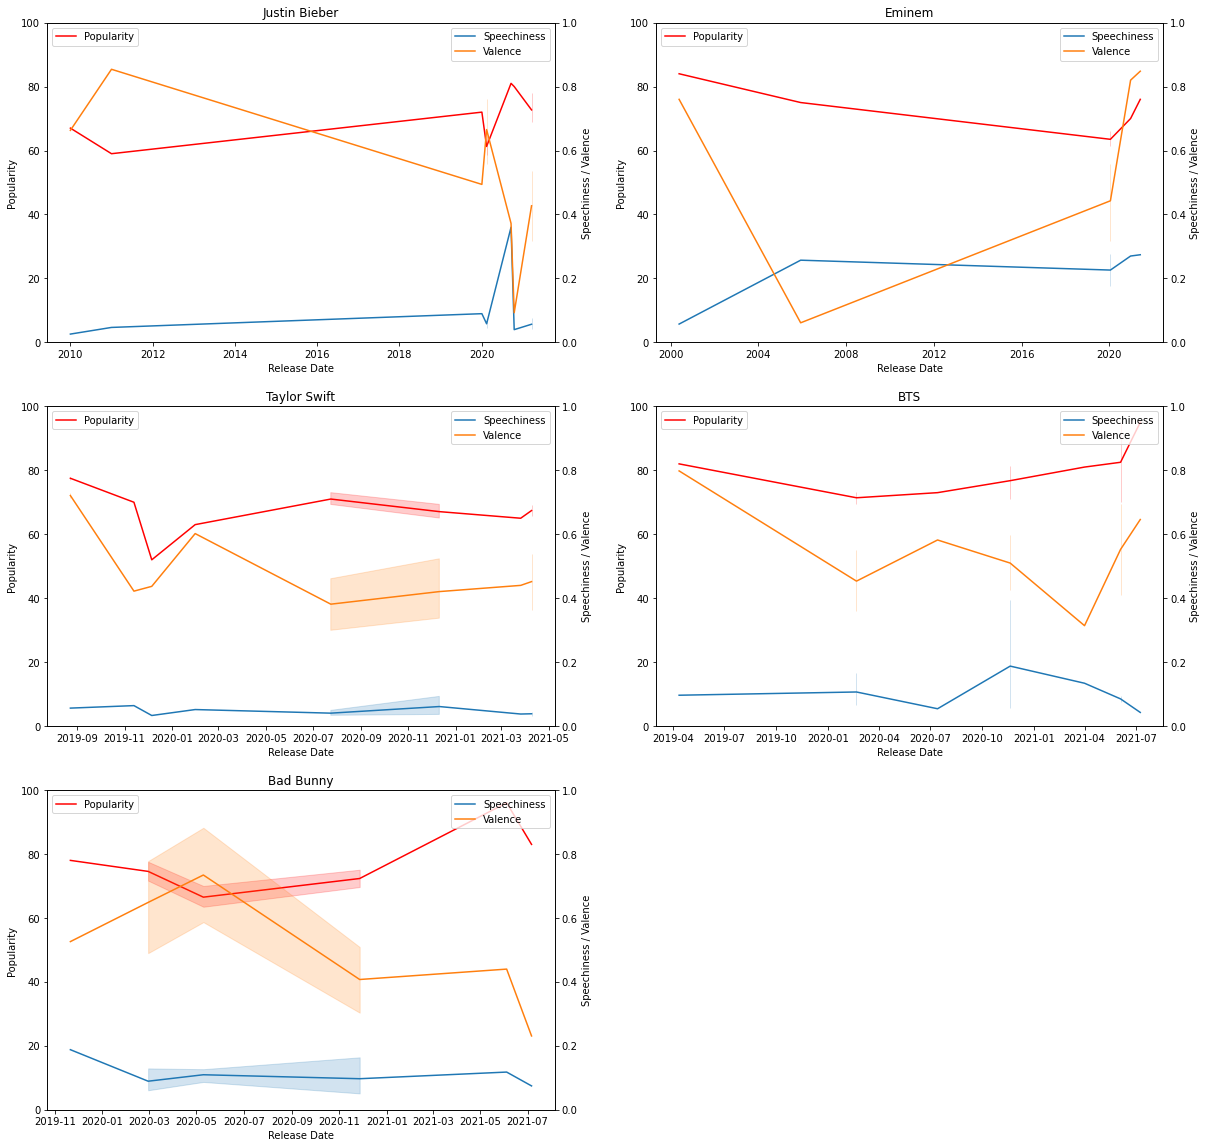

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (20, 20))

sns.lineplot(ax = axes[0,0], x = 'Release Date', y = 'Popularity', data = jb, color = 'r', label = 'Popularity')
ax002 = axes[0,0].twinx()
ax002.set(ylim=(0, 1.0))
ax002.set_ylabel("Speechiness / Valence")
sns.lineplot(ax = ax002, x = 'Release Date', y = 'Speechiness', data = jb, label = 'Speechiness')
sns.lineplot(ax = ax002, x = 'Release Date', y = 'Valence', data = jb, label = 'Valence')
axes[0,0].set_title('Justin Bieber')
axes[0,0].set(ylim=(0, 100))
axes[0,0].legend(loc = 2)

sns.lineplot(ax = axes[0,1], x = 'Release Date', y = 'Popularity', data = em, color = 'r', label = 'Popularity')
ax012 = axes[0,1].twinx()
ax012.set(ylim=(0, 1.0))
ax012.set_ylabel("Speechiness / Valence")
sns.lineplot(ax = ax012, x = 'Release Date', y = 'Speechiness', data = em, label = 'Speechiness')
sns.lineplot(ax = ax012, x = 'Release Date', y = 'Valence', data = em, label = 'Valence')
axes[0,1].set_title('Eminem')
axes[0,1].set(ylim=(0, 100))
axes[0,1].legend(loc = 2)

sns.lineplot(ax = axes[1,0], x = 'Release Date', y = 'Popularity', data = ts, color = 'r', label = 'Popularity')
ax102 = axes[1,0].twinx()
ax102.set(ylim=(0, 1.0))
ax102.set_ylabel("Speechiness / Valence")
sns.lineplot(ax = ax102, x = 'Release Date', y = 'Speechiness', data = ts, label = 'Speechiness')
sns.lineplot(ax = ax102, x = 'Release Date', y = 'Valence', data = ts, label = 'Valence')
axes[1,0].set_title('Taylor Swift')
axes[1,0].set(ylim=(0, 100))
axes[1,0].legend(loc = 2)

sns.lineplot(ax = axes[1,1], x = 'Release Date', y = 'Popularity', data = bts, color = 'r', label = 'Popularity')
ax112 = axes[1,1].twinx()
ax112.set(ylim=(0, 1.0))
ax112.set_ylabel("Speechiness / Valence")
sns.lineplot(ax = ax112, x = 'Release Date', y = 'Speechiness', data = bts, label = 'Speechiness')
sns.lineplot(ax = ax112, x = 'Release Date', y = 'Valence', data = bts, label = 'Valence')
axes[1,1].set_title('BTS')
axes[1,1].set(ylim=(0, 100))
axes[1,1].legend(loc = 2)

sns.lineplot(ax = axes[2,0], x = 'Release Date', y = 'Popularity', data = bb, color = 'r', label = 'Popularity')
ax202 = axes[2,0].twinx()
ax202.set(ylim=(0, 1.0))
ax202.set_ylabel("Speechiness / Valence")
sns.lineplot(ax = ax202, x = 'Release Date', y = 'Speechiness', data = bb, label = 'Speechiness')
sns.lineplot(ax = ax202, x = 'Release Date', y = 'Valence', data = bb, label = 'Valence')
axes[2,0].set_title('Bad Bunny')
axes[2,0].set(ylim=(0, 100))
axes[2,0].legend(loc = 2)

axes[2,1].axis('off')

#### For Justin Bieber's songs, popularity is on a general uptrend since early 2010s. An interesting finding is in Feb 2020, release of 'Changes' album whereby the valence spike to ~0.7, speechiness spike to ~0.35, and popularity dip from 70 to 60. In 2021, where he released new album 'Justice', the valence dip to 0.1, and the speechiness also dropped back to baseline, the popularity of the songs increased to 80.

#### Eminem's 2000 song release 'The Real Slim Shady is the most popular. His popularity generally decrese from 2000 to 2020. In 2020, He released album 'Music To be Murdered By' in 2020, with higher speechiness because he is a rapper and more valence. His popularity started to increase again.

#### For Taylor Swift, the song released in Aug 2019, 'You Need to Calm Down' and 'ME!' , with high valence are the most popular in the dataset. The Dec 2019 Christmas song release is the least popular, generally lower valence. Her 2020 album 'folklore' released during the covid pandemic increase popularity slightly and had generally low valence consisting of mellow ballads instead of her typical upbeat pop songs. In 2021, she had several re-releases of her old songs, which were slightly more positive, and were probably popular with her long-time fans.

#### BTS' songs generally have very high popularity. In 2019 they released 'Boy With Luv' which was a highly positive song and met with alot of popularity. In Feb 2020, they released album 'Map of the Soul', an album with lower valence reflecting personal growth. In Nov 2020, album 'BE' was released which seems to consist of more rap songs based on the higher speechiness. In 2021, they release single 'Butter' and 'Permission to Dance', which were very postive energetic songs and met with soaring popularity.

#### Bad Bunny's popularity is generally increasing since 2019. He released his first individual song in Nov 2019, 'Vete', which seems to be a rap song based on the speechiness. In 2020, he had 3 album releases, 'YHLQMDLG' in Feb, 'LAS QUE NO IBAN A SALIR' in May and 'EL ULTIMO TOUR DEL MUNDO' in Nov. Contrary to other artists, the popularity of Bad Bunny's songs seems  to be an inverse relationship with the valence. His most popular songs were relased in 2021, 'De Museo' and 'Yonaguni', which also saw a deep in valence.

### Popular Songs released in 2020 by Genre

In [10]:
df_genre = df[['Release Date', 'Genre']]
df_genre.loc[:,'Release Year'] = df_genre['Release Date'].str[-4:]
songs_2020 = df_genre.loc[df_genre['Release Year'] == '2020']

songs_2020.loc[:,'Release Date'] = pd.to_datetime(songs_2020.loc[:,'Release Date'], format='%m/%d/%Y')
songs_2020.loc[:,'Week Number'] = songs_2020.loc[:,'Release Date'].dt.isocalendar().week

songs_2020.loc[:,'Genre'] = songs_2020['Genre'].str.split(", ")
s = songs_2020.apply(lambda x: pd.Series(x['Genre']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Genre'
songs_2020 = songs_2020.drop('Genre', axis=1).join(s)
songs_2020.loc[:, 'Genre'] = songs_2020['Genre'].apply(lambda x: ''.join(map(str, x)))

top10_genre = dict(songs_2020['Genre'].value_counts().head(10))

C:\Users\ranic\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\ranic\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\ranic\anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [11]:
pop = songs_2020.loc[songs_2020['Genre'] == 'pop']
rap = songs_2020.loc[songs_2020['Genre'] == 'rap']
post_teen_pop = songs_2020.loc[songs_2020['Genre'] == 'post-teen pop']
dance_pop = songs_2020.loc[songs_2020['Genre'] == 'dance pop']
trap = songs_2020.loc[songs_2020['Genre'] == 'trap']
pop_rap = songs_2020.loc[songs_2020['Genre'] == 'pop rap']
reggaeton = songs_2020.loc[songs_2020['Genre'] == 'reggaeton']
trap_latino = songs_2020.loc[songs_2020['Genre'] == 'trap latino']
latin = songs_2020.loc[songs_2020['Genre'] == 'latin']
hip_hop = songs_2020.loc[songs_2020['Genre'] == 'hip hop']

top10genresongs = [pop, rap,post_teen_pop, dance_pop, trap,pop_rap, reggaeton,trap_latino, latin, hip_hop]
nan_value = 0
top10genre_songs = pd.concat(top10genresongs, join='outer', axis=0).fillna(nan_value)

df_groups = top10genre_songs.groupby(['Week Number', 'Genre']).size().reset_index(name='counts')

genre_group = df_groups.pivot_table('counts', ['Genre'], 'Week Number').fillna(0.0)

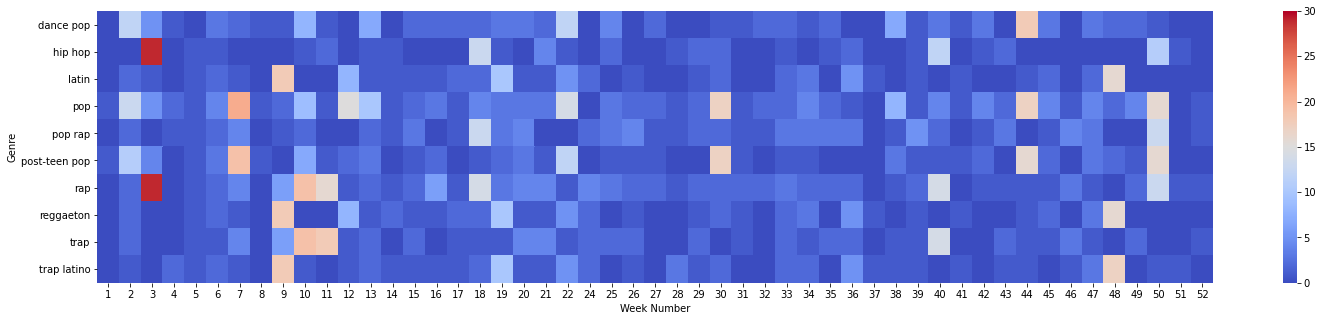

In [12]:
fig, ax = plt.subplots(figsize=(25,5))

ax = sns.heatmap(genre_group, vmin=0, vmax=30, cmap="coolwarm")

Based on the heatmap, the highest number of rap and hip hop songs were generally released in the beginning of 2020. About 20 pop, latino, reggarton songs were released within the first quarter as well. Some pop songs were released in the middle of the year in time for summer. Towards the end of the year, more songs were released across all genres, especially for pop, may be to celebrate coming holidays.

### What attributes decides popularity?

In [13]:
df['Danceability'] = df['Danceability'].str.replace(' ', '')
df[['Danceability']] = df[['Danceability']].apply(pd.to_numeric, axis=1)

df['Energy'] = df['Energy'].str.replace(' ', '')
df[['Energy']] = df[['Energy']].apply(pd.to_numeric, axis=1)

df['Loudness'] = df['Loudness'].str.replace(' ', '')
df[['Loudness']] = df[['Loudness']].apply(pd.to_numeric, axis=1)

df['Acousticness'] = df['Acousticness'].str.replace(' ', '')
df[['Acousticness']] = df[['Acousticness']].apply(pd.to_numeric, axis=1)

df['Liveness'] = df['Liveness'].str.replace(' ', '')
df[['Liveness']] = df[['Liveness']].apply(pd.to_numeric, axis=1)

df['Tempo'] = df['Tempo'].str.replace(' ', '')
df[['Tempo']] = df[['Tempo']].apply(pd.to_numeric, axis=1)

df['Duration (ms)'] = df['Duration (ms)'].str.replace(' ', '')
df[['Duration (ms)']] = df[['Duration (ms)']].apply(pd.to_numeric, axis=1)
df[['Duration (ms)']] = df[['Duration (ms)']].fillna(0).astype(int)

In [14]:
df_pop = df[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']]

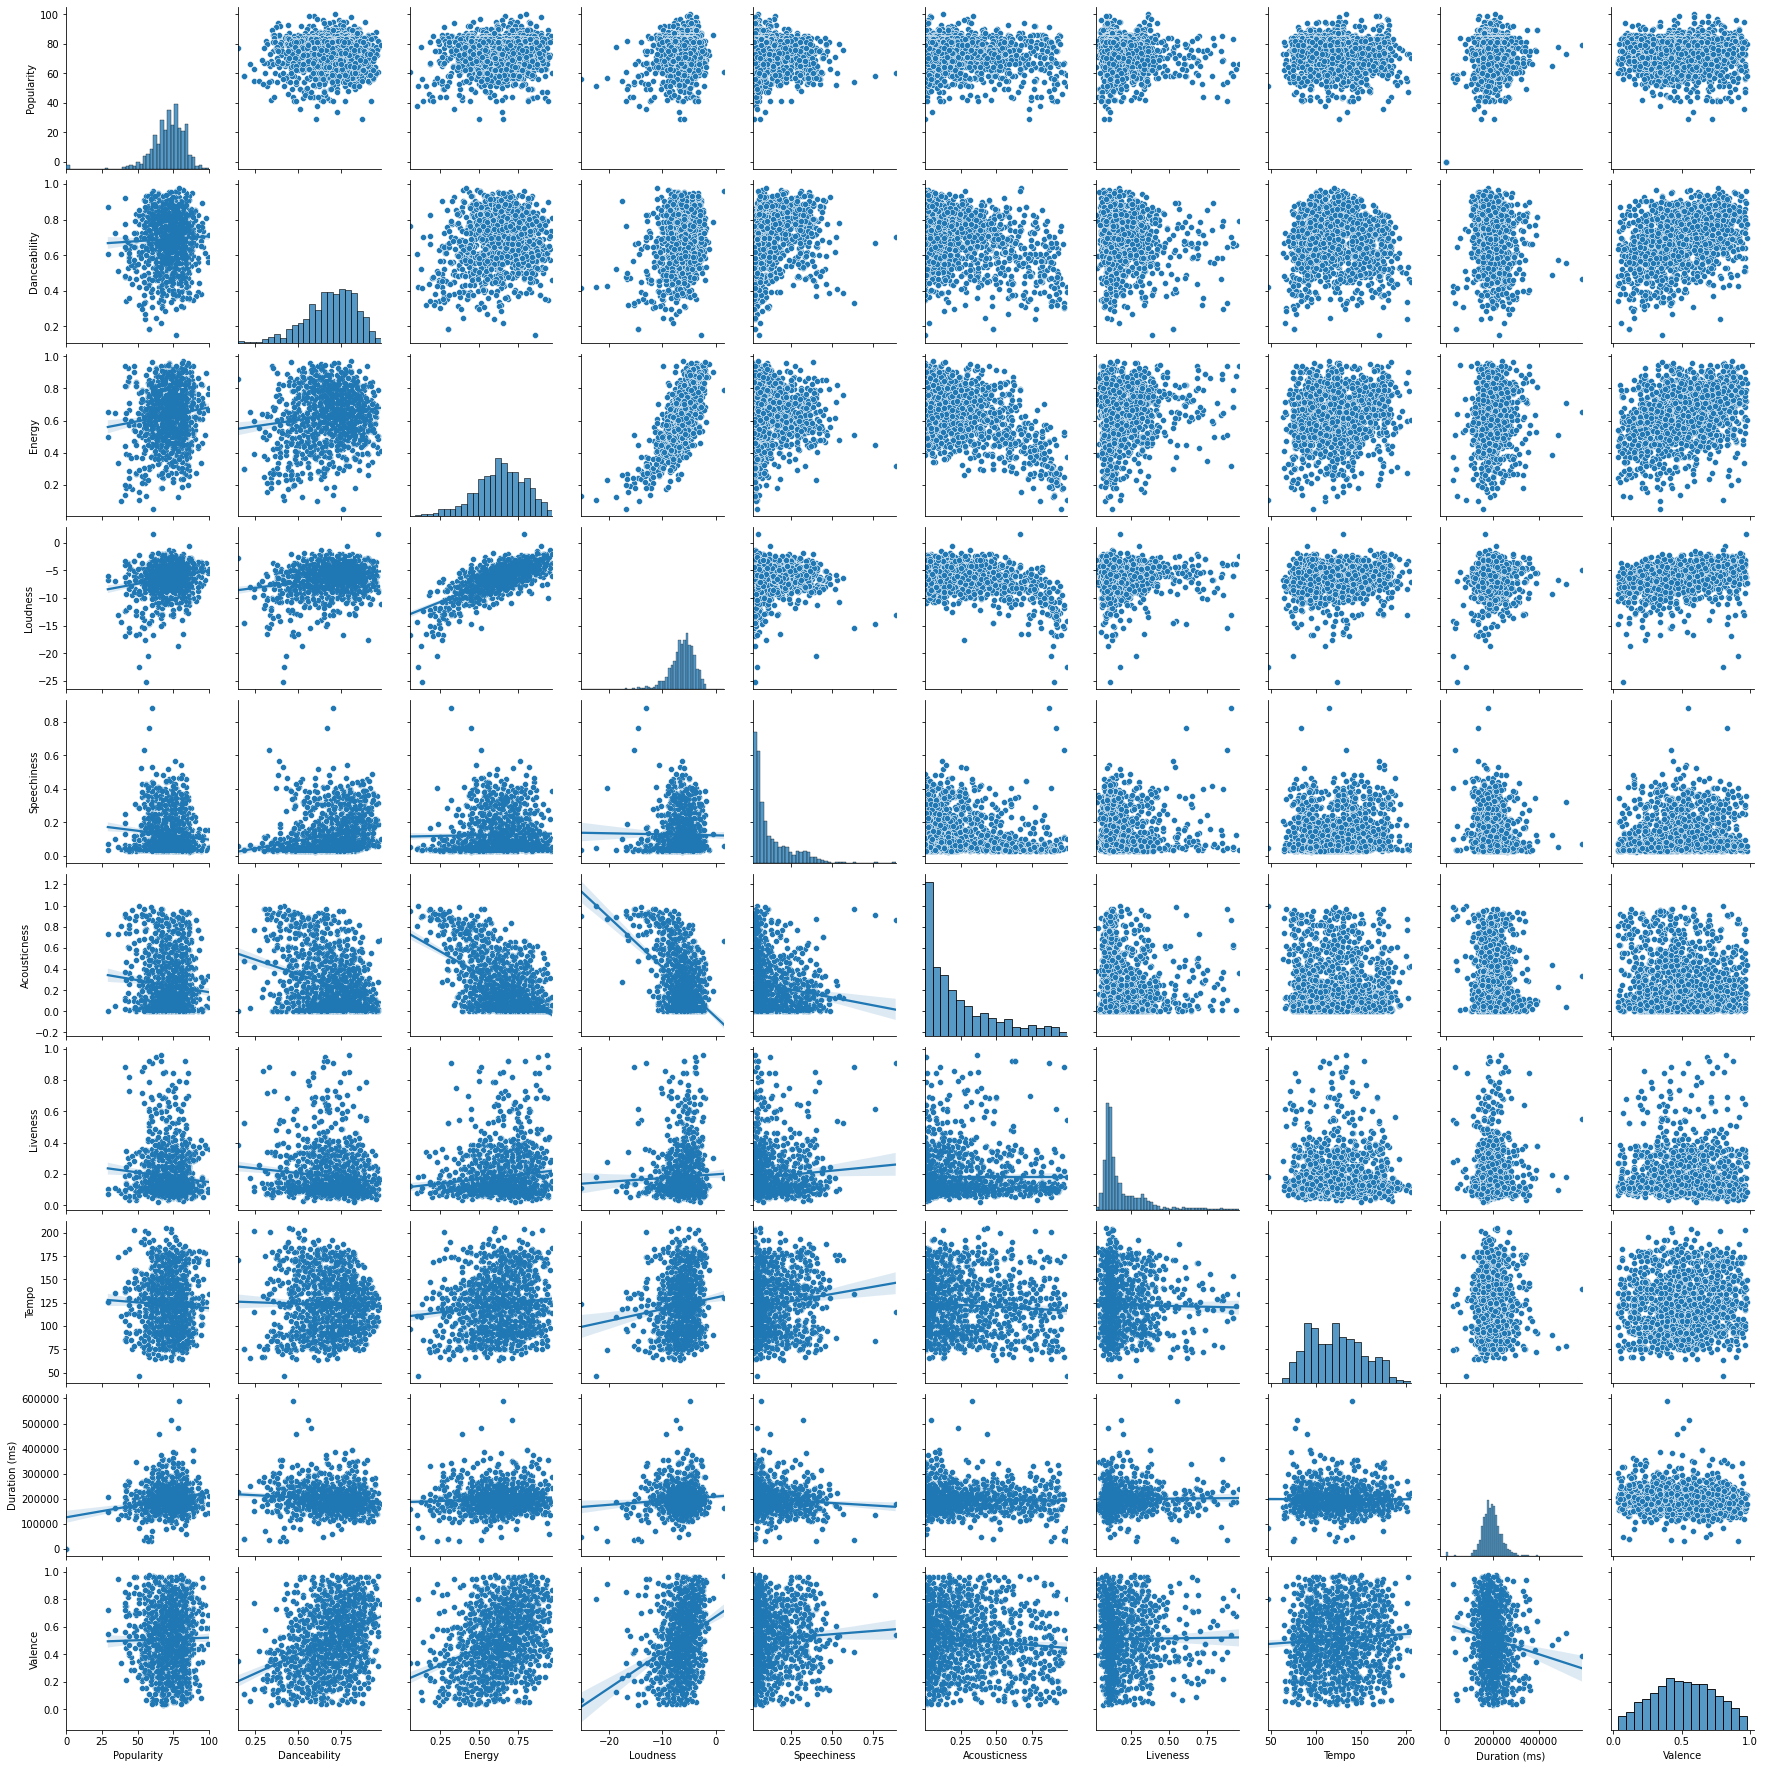

In [15]:
fig = sns.pairplot(data = df_pop)
fig.map_lower(sns.regplot, scatter_kws={'s':5})
plt.show()

#### Based on the general trendline for the pairplot, higher the danceability, energy, loudness, duration and valence, higher the popularity. On the other hand, lower the speechiness, liveness, tempo, higher the popularity. It is also notable that the correlation of the paramters to popularity may not be strong as there are many points scattered far from the trendline.

#### Other interesting charts in the pairplot show that energy and loudness are positively correlated, acousticness and loudness are inveresely correlated which are expected.